<a href="https://colab.research.google.com/github/Doson24/Analyse_alarms/blob/main/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%B0%D0%BB%D0%B0%D1%80%D0%BC_%D0%A6%D0%9A%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
names = ['start_date', 'start_time', 'end_time', 'duration', 'message', 'limit']
data_df1 = pd.read_csv('/content/drive/MyDrive/GeekBrains/Python/ЦКС /фильтр_аларм/SUM.csv', sep='\t', encoding='cp1251', names= names, infer_datetime_format=True)

In [ ]:
names = ['start_date', 'start_time', 'end_date', 'end_time', 'duration', 'message', 'limit', 'acknowledgement']
data_df2 = pd.read_csv('/content/drive/MyDrive/GeekBrains/Python/ЦКС /фильтр_аларм/SUM1.csv', sep='\t', encoding='cp1251', names= names, infer_datetime_format=True)

In [ ]:
names = ['start_date', 'start_time', 'end_date', 'end_time', 'duration', 'message', 'limit', 'acknowledgement']
data_df3 = pd.read_csv('/content/drive/MyDrive/GeekBrains/Python/ЦКС /фильтр_аларм/SUM3.csv', sep='\t', encoding='cp1251', names= names, infer_datetime_format=True)

In [ ]:
data_df = pd.concat([data_df1, data_df2, data_df3], ignore_index=True)

In [ ]:
# Очистка от пробелов 
data_df.start_date = [i.strip() for i in data_df.start_date]
data_df.start_time = [i.strip() for i in data_df.start_time]
#удаление NaN в end_date
data_df.end_date = [i.strip() if i is not np.nan else i for i in data_df.end_date]

data_df.end_time = [i.strip() for i in data_df.end_time]
data_df.duration = [i.strip() for i in data_df.duration]
data_df.message = [i.strip() for i in data_df.message]

In [ ]:
# data_df.start_date[data_df.start_date != '0']
# data_df.start_time[(data_df.start_time != '0')]
# data_df.end_time[(data_df["end_time"] != '0')]
# data_df.duration[(data_df.duration != '0')]

In [ ]:
# Очистка от 0 значений 
data_df = data_df[(data_df.start_date != '0')]
data_df = data_df[(data_df.end_date != '0')]
data_df = data_df[(data_df.duration != '0')]

# data_df = data_df[(data_df.start_date != '0') & (data_df.start_time != '0') & (data_df.end_time != '0') & (data_df.duration !='0')]
#Преобразование типов
data_df.start_date = pd.to_datetime(data_df.start_date, format='%d.%m.%Y')
data_df.end_date = pd.to_datetime(data_df.end_date, format='%d.%m.%Y')
data_df.duration = pd.to_timedelta(data_df.duration)

data_df.drop_duplicates(inplace=True)

#ТОП 25 дней по количеству сообщений 

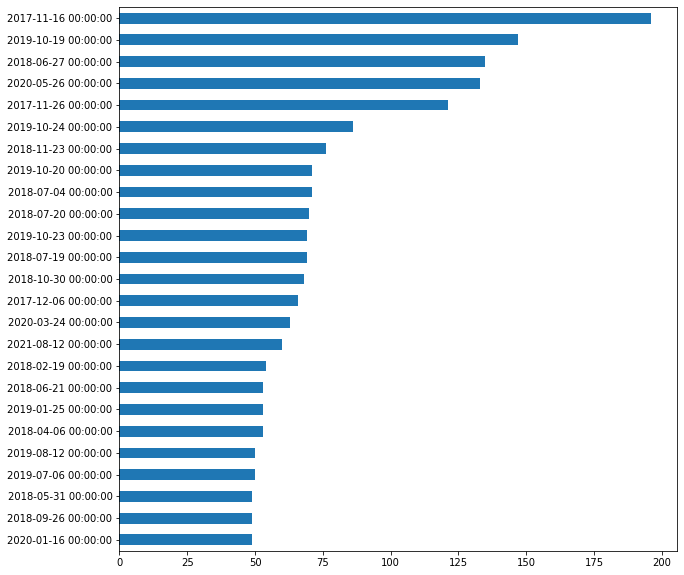

In [ ]:
# data_df.start_date.value_counts().head(25).sort_index().plot(kind='barh', figsize= (10, 10))
data_df.start_date.value_counts(ascending=True).tail(25).plot(kind='barh', figsize= (10, 10))


# Распределение кол-ва сообщений по дням недели

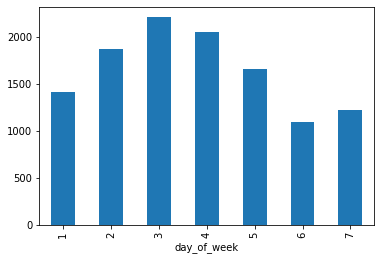

In [ ]:
data_df['day_of_week'] = data_df.start_date.dt.day_of_week + 1

data_df.day_of_week.groupby(data_df.day_of_week).count().plot(kind='bar')

###Фильтр по имени сообщения

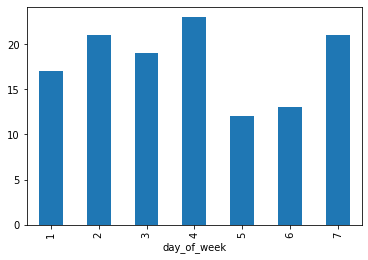

In [ ]:
search_name = "Внимание! Нет ИФКТ от ЦУП"
data_df[data_df.message == search_name].day_of_week.groupby(data_df.day_of_week).count().plot(kind='bar')

#Распределение сообщений по их кол-ву 

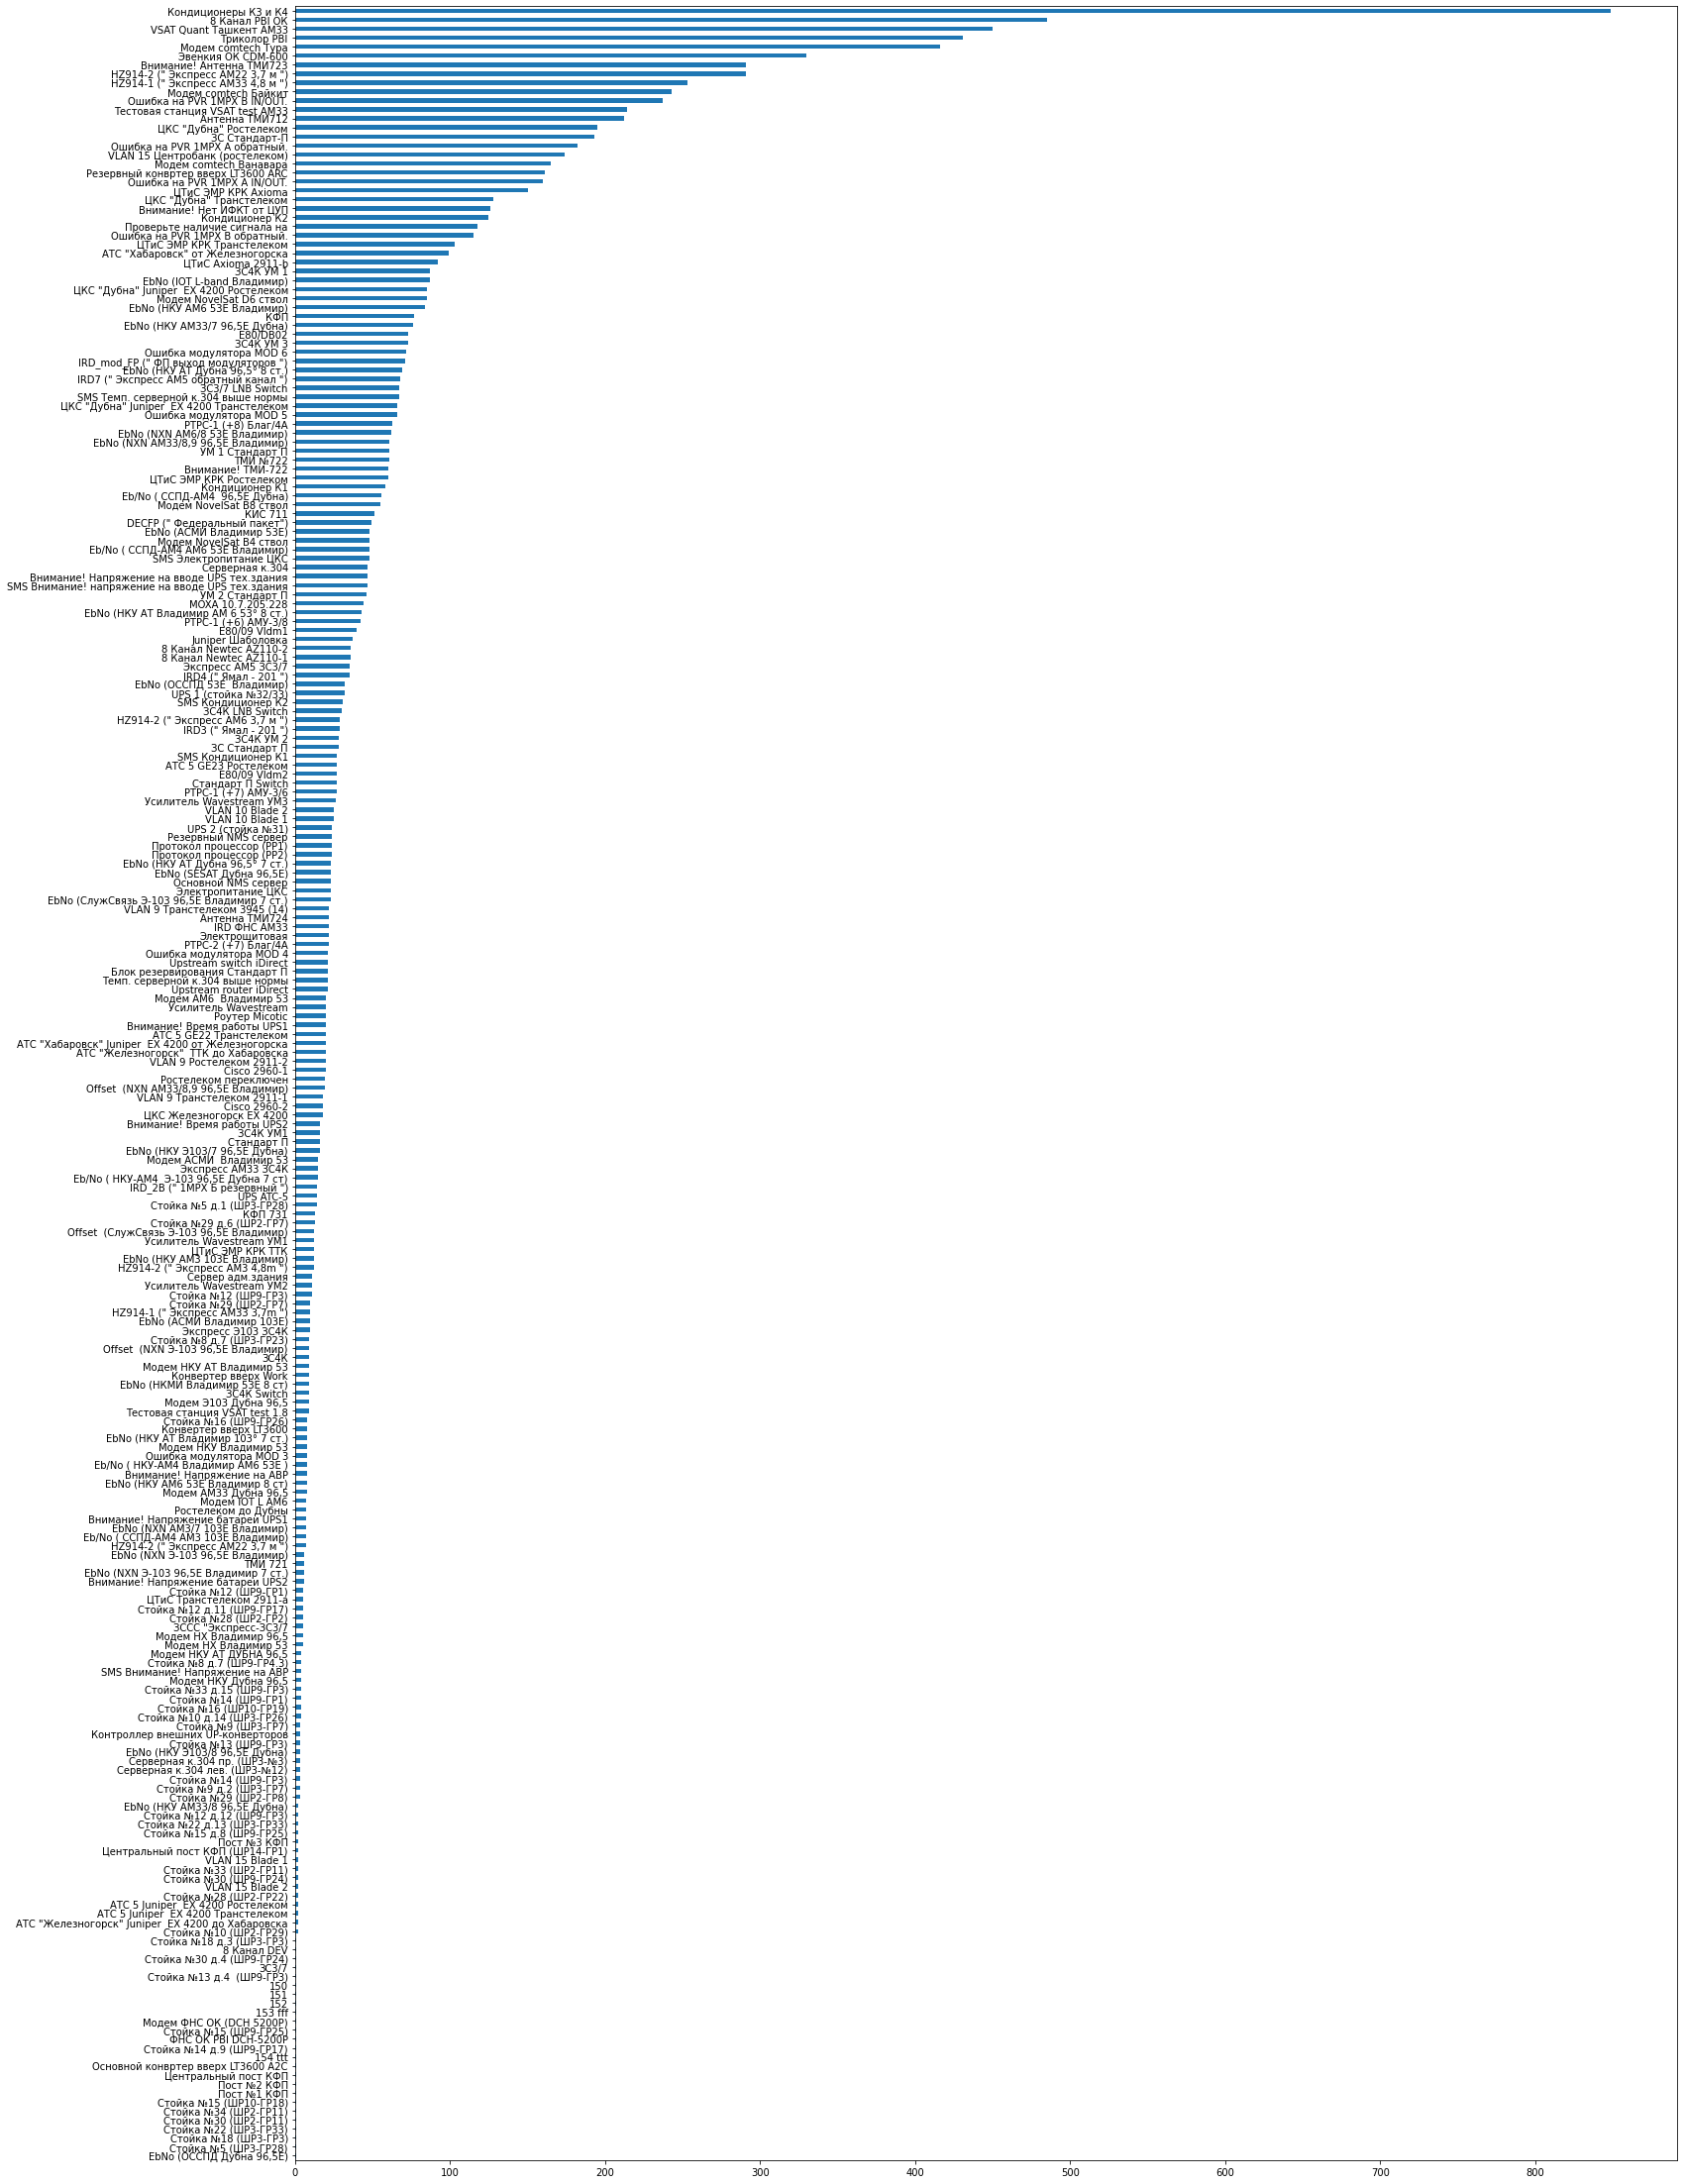

In [ ]:
# data_df[data_df.start_date > '2020-01-01'].message.value_counts(ascending=True).plot(kind='barh', figsize=(25,40))
data_df.message.value_counts(ascending=True).plot(kind='barh', figsize=(25,40))


# Распределение кол-ва сообщений по месяцам

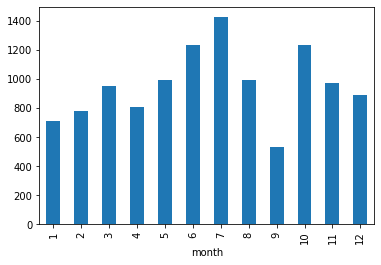

In [ ]:
data_df['month'] = data_df.start_date.dt.month
data_df.month.groupby(data_df.month).count().plot(kind='bar')

##Распределение кол-ва сообщений по месяцам год к году

In [ ]:
data_df['year'] = data_df.start_date.dt.year
data_df.year.unique()
#Проверка дублирующих данных
data_df[data_df.year == 2021][data_df.month == 6][data_df.message==search_name]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,start_date,start_time,end_time,duration,message,limit,end_date,acknowledgement,day_of_week,month,year
28225,2021-06-03,11:21:08,11:21:42,0 days 00:00:34,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-03,Квитированные,4,6,2021
28229,2021-06-03,11:29:17,11:29:53,0 days 00:00:36,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-03,Квитированные,4,6,2021
28238,2021-06-03,16:22:12,16:28:59,0 days 00:06:47,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-03,Квитированные,4,6,2021
28329,2021-06-09,13:54:07,13:57:03,0 days 00:02:56,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-09,Квитированные,3,6,2021
28340,2021-06-13,15:32:48,15:33:10,0 days 00:00:22,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-13,Квитированные,7,6,2021
28344,2021-06-13,15:33:58,15:34:14,0 days 00:00:16,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-13,Квитированные,7,6,2021
28347,2021-06-13,15:34:33,15:35:03,0 days 00:00:30,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-13,Квитированные,7,6,2021
28359,2021-06-14,11:29:06,11:29:53,0 days 00:00:47,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-14,Квитированные,1,6,2021
28566,2021-06-27,07:46:06,07:46:50,0 days 00:00:44,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-27,Квитированные,7,6,2021
28569,2021-06-27,07:54:13,07:55:05,0 days 00:00:52,Внимание! Нет ИФКТ от ЦУП,проверить сервер ИФК (Сообщи первому)! ...,2021-06-27,Квитированные,7,6,2021


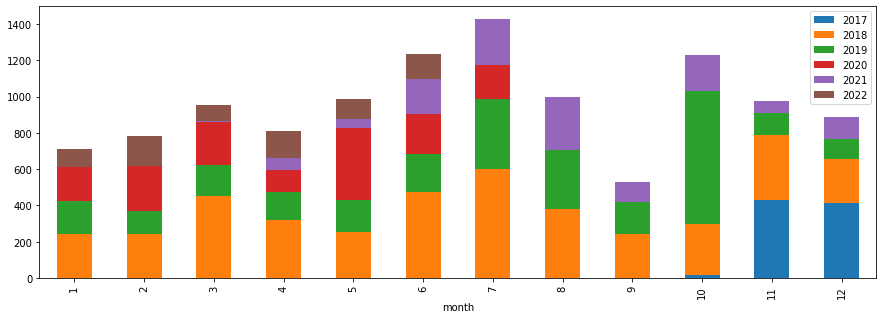

In [ ]:

data_year = pd.concat([data_df[data_df.year == year].month.groupby(data_df.month).count() 
for year in data_df['year'].unique()], axis=1)

data_year.columns = data_df.year.unique()
data_year.drop(2016, axis=1, inplace=True)
data_year.plot(kind='bar', figsize=(15,5), stacked=True)


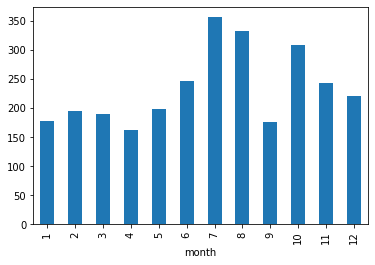

In [ ]:
#Среднее кол-во сообщений по месяцам
data_year.mean(axis=1).plot(kind='bar')

###Фильтр по имени сообщения

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


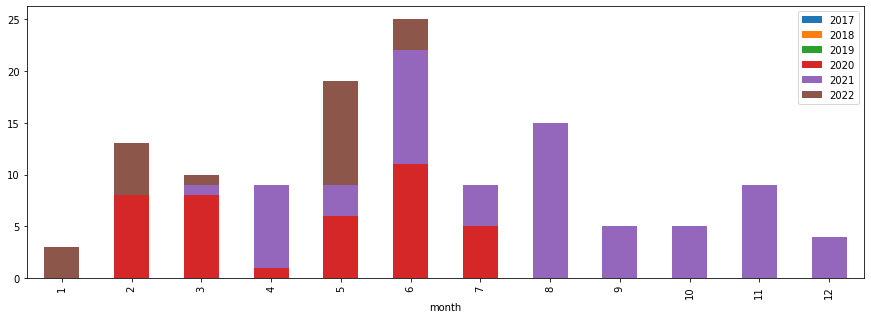

In [ ]:
data_year = pd.concat([data_df[data_df.message == search_name][data_df.year == year]\
                      #  .drop_duplicates()\
                       .month.groupby(data_df.month).count() 
                       for year in data_df['year'].unique()], axis=1)

data_year.columns = data_df.year.unique()
data_year.drop(2016, axis=1, inplace=True)
data_year.plot(kind='bar', figsize=(15,5), stacked=True)


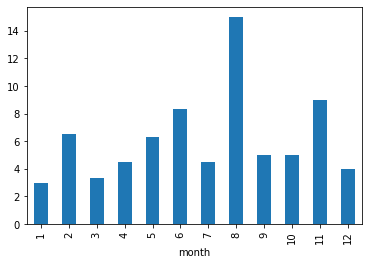

In [ ]:
#Среднее кол-во сообщений по месяцам
data_year.mean(axis=1).plot(kind='bar')

In [ ]:
len(data_df[data_df.month == 7] )

1426

In [ ]:
# Категория сообщений
catagory = {
    "Электропитание": ['Стойка №29 (ШР2-ГР8)', 'Стойка №16 (ШР9-ГР26)','Внимание! Время работы UPS1',
                       'Внимание! Время работы UPS2', 'Внимание! Напряжение батареи UPS1',
                       'Стойка №16 (ШР10-ГР19)', 'Стойка №10 (ШР2-ГР29)', 'UPS 2 (стойка №31)', 
                       'UPS 1 (стойка №32/33)', 'Внимание! Напряжение на АВР',   'Электрощитовая',
                       'SMS Внимание! Напряжение на АВР', 'Стойка №14 (ШР9-ГР3)',
                       'Электропитание ЦКС', 'SMS Электропитание ЦКС',
                       'Стойка №33 д.15 (ШР9-ГР3)', 'Стойка №14 д.9 (ШР9-ГР17)',
                       'Стойка №5 д.1 (ШР3-ГР28)', 'Стойка №29 д.6 (ШР2-ГР7)',
                       'Стойка №15 д.8 (ШР9-ГР25)', 'Стойка №22 д.13 (ШР3-ГР33)',
                       'Стойка №18 д.3 (ШР3-ГР3)', 'Стойка №8 д.7 (ШР3-ГР23)',
                       'Стойка №10 д.14 (ШР3-ГР26)', 'Стойка №12 д.11 (ШР9-ГР17)',
                       'Стойка №13 (ШР9-ГР3)', 'Стойка №33 (ШР2-ГР11)',
                       'Стойка №15 (ШР9-ГР25)', 'Стойка №5 (ШР3-ГР28)',
                       'Стойка №9 (ШР3-ГР7)', 'Стойка №18 (ШР3-ГР3)',
                       'Стойка №22 (ШР3-ГР33)', 'Стойка №30 (ШР2-ГР11)',
                       'Стойка №34 (ШР2-ГР11)', 'Стойка №15 (ШР10-ГР18)',
                       'Стойка №29 (ШР2-ГР7)', 'Серверная к.304 лев. (ШР3-№12)',
                       'Серверная к.304 пр. (ШР3-№3)', 'UPS ATC-5',
                       'Стойка №14 (ШР9-ГР1)',
                       'Стойка №12 (ШР9-ГР1)',
                       'Внимание! Напряжение на вводе UPS тех.здания',
                       'SMS Внимание! напряжение на вводе UPS тех.здания',
                       'Стойка №12 (ШР9-ГР3)', 'Внимание! Напряжение батареи UPS2',

                       ],
    
    'НКУ':['Внимание! Антенна ТМИ723', 'Внимание! ТМИ-722', 'КФП', 'КИС 711', 'КФП 731',
           'Антенна ТМИ712', 'Антенна ТМИ724', 'Пост №1 КФП', 'Пост №2 КФП', 
           'Центральный пост КФП', 'Пост №3 КФП', 'ТМИ 721',
           ],
    
    'ССПД':['EbNo (NXN AM33/8,9 96,5Е Владимир)', 'Offset  (NXN AM33/8,9 96,5Е Владимир)', 
            'Eb/No ( CCПД-АМ4 АM3 103Е Владимир)', 'EbNo (НКУ АТ Владимир 103° 7 ст.)', 
            'EbNo (NXN AM3/7 103Е Владимир)', 'EbNo (IOT L-band Владимир)', 'EbNo (АСМИ Владимир 103E)', 
            'EbNo (НКУ АМ33/7 96,5Е Дубна)', 'EbNo (НКУ AM3 103Е Владимир)', 
            'EbNo (НКУ АТ Владимир АМ 6 53° 8 ст.)', 'EbNo (NXN AM6/8 53Е Владимир)',
            'EbNo (АСМИ Владимир 53E)', 'Eb/No ( CCПД-АМ4 АM6 53Е Владимир)',
            'EbNo (НКУ AM6 53Е Владимир)', 'EbNo (НКУ АТ Дубна 96,5° 8 ст.)',
            'EbNo (SESAT Дубна 96,5E)', 'Eb/No ( CCПД-АМ4  96,5Е Дубна)',
            'EbNo (ОССПД 53Е  Владимир)', 'EbNo (NXN Э-103 96,5Е Владимир 7 ст.)',
            'EbNo (НКУ AM6 53Е Владимир 8 ст)', 'Eb/No ( НКУ-АМ4 Владимир АM6 53Е )',
            'EbNo (НКМИ Владимир 53E 8 ст)', 'EbNo (СлужСвязь Э-103 96,5Е Владимир 7 ст.)',  
            'EbNo (НКУ АМ33/8 96,5Е Дубна)','Модем НКУ АТ Владимир 53', 'Модем АСМИ  Владимир 53',
            'Модем НХ Владимир 96,5',
            ],

    "Наземный канал":['АТС "Хабаровск" Juniper  EX 4200 от Железногорска', 
                      'ЦКС "Дубна" Juniper  EX 4200 Ростелеком', 'ЦКС "Дубна" Juniper  EX 4200 Транстелеком',
                      'ЦТиС ЭМР КРК Транстелеком', 'ЦКС Железногорск EX 4200',
                      'VLAN 9 Транстелеком 3945 (14)'
                      'Роутер Micotic', 'VLAN 15 Blade 1', 'VLAN 15 Blade 2', 
                      'Cisco 2960-2','Cisco 2960-1', 'АТС 5 Juniper  EX 4200 Ростелеком', 
                      'АТС 5 Juniper  EX 4200 Транстелеком', 'АТС "Железногорск" Juniper  EX 4200 до Хабаровска', 
                      'VLAN 10 Blade 1', 'VLAN 10 Blade 2', 'АТС "Хабаровск" от Железногорска',
                      'ЦКС "Дубна" Транстелеком', 'ЦКС "Дубна" Ростелеком',
                      'АТС "Железногорск"  ТТК до Хабаровска', 'АТС 5 GE22 Транстелеком',
                      'ЦТиС ЭМР КРК Axioma', 'ЦТиС Axioma 2911-b', 'АТС 5 GE23 Ростелеком', 
                      'ЦТиС ЭМР КРК ТТК', 'ЦТиС Транстелеком 2911-a',
                      ],
    
    "ЗС3/7":['HZ914-1 (" Экспресс АМ33 3,7m ")', 'IRD_mod_FP (" ФП выход модуляторов ")', 
             'HZ914-2 (" Экcпресс АM22 3,7 м ")',
             'HZ914-2 (" Экспресс АM22 3,7 м ")',
             'Экспресс АМ5 ЗС3/7'
             ],
    
    "ЗС Стандарт-П":['УМ 1 Стандарт П', 'УМ 2 Стандарт П', ],
    
    "ЗС4К":['ЗС4К УМ 2', 'ЗС4К УМ 3', 'ЗС4К УМ 1', 'ЗС4К Switch',],
    
    "VSAT":['Тестовая станция VSAT test 1.8', 'VLAN 15 Центробанк (ростелеком)', 
            'VSAT Quant Ташкент AM33', 'Тестовая станция VSAT test AM33', 
            'Upstream router iDirect', 'Upstream switch iDirect', 'Основной NMS сервер',
            'Резервный NMS сервер', 'Протокол процессор (PP1)', 'Протокол процессор (PP2)'
            
            ],

    "Спутниковая связь": [
                          'IRD ФНС AM33',
    ]
    

}

#Под вопросом
['Кондиционеры К3 и К4', 'Кондиционер К1', 'Кондиционер К2','Серверная к.304',
 'Модем NovelSat B4 ствол', 'DECFP (" Федеральный пакет")', 
 'Модем NovelSat B8 ствол', 'Модем comtech Ванавара','HZ914-2 (" Экспресс АM3 4,8m ")', 
 'Модем comtech Тура', 'Эвенкия ОК CDM-600', 'ФНС ОК PBI DCH-5200P','Модем ФНС ОК (DCH 5200P)'
 'Модем comtech Байкит','IRD7 (" Экспресс АМ5 обратный канал ")', 'IRD4 (" Ямал - 201 ")'
 'Модем NovelSat D6 ствол', 'HZ914-1 (" Экспресс АМ33 4,8 м ")', 'IRD3 (" Ямал - 201 ")',
 'Контроллер внешних UP-конверторов'
 
 'Ошибка на PVR 1MPX A обратный.', 
 'Проверьте наличие сигнала на', 'SMS Кондиционер К2',
 'SMS Кондиционер К1', 'Ошибка на PVR 1MPX A IN/OUT.', 
 'Резервный конвртер вверх LT3600 ARC',
       
 'Ошибка модулятора MOD 5', 'Ошибка на PVR 1MPX B обратный.',
'Ошибка модулятора MOD 4', 
'Ошибка на PVR 1MPX B IN/OUT.', 'Конвертер вверх Work',
'Ошибка модулятора MOD 3', 'Конвертер вверх LT3600',
'Ошибка модулятора MOD 6',
       
'IRD_2B (" 1MPX Б резервный ")',      ]

# Не отсортировано

""" 
        'Усилитель Wavestream УМ3',
       'Усилитель Wavestream УМ1', 'Усилитель Wavestream УМ2', 'ЗС3/7',
       'Блок резервирования Стандарт П', 'ЗС Стандарт П', 
       'SMS Темп. серверной к.304 выше нормы', 'Модем АМ6  Владимир 53',
       'Модем АМ33 Дубна 96,5', 'Усилитель Wavestream',
       'Сервер адм.здания', 'HZ914-2 (" Экспресс АM6 3,7 м ")',
       'ЗС Стандарт-П', 'MOXA 10.7.205.228', 'ЗС4К', 'ЗС3/7 LNB Switch',
       'Стандарт П', 'Стандарт П Switch', 'Модем НКУ Владимир 53',
       'Модем НХ Владимир 53', 'ЦТиС ЭМР КРК Ростелеком',
       'VLAN 9 Транстелеком 2911-1', '150', '151', '152', '153 fff',
       '154 ttt', 'Модем IOT L АМ6', 'Модем НКУ Дубна 96,5',
       '8 Канал PBI ОК', '8 Канал Newtec AZ110-1',
       '8 Канал Newtec AZ110-2', 'Триколор PBI', 'ЗССС "Экспресс-ЗС3/7',
       'Juniper Шаболовка', 'VLAN 9 Ростелеком 2911-2',
       'Основной конвртер вверх LT3600 A2C', 'Стойка №28 (ШР2-ГР2)',
       'Стойка №28 (ШР2-ГР22)', 'ЗС4К LNB Switch', 'Экспресс АМ33 ЗС4К',
       'Модем НКУ АТ ДУБНА 96,5', 'Стойка №30 (ШР9-ГР24)',
        
       
       'Внимание! Нет ИФКТ от ЦУП', ' 'Темп. серверной к.304 выше нормы',
        'Offset  (NXN Э-103 96,5Е Владимир)',
       'EbNo (NXN Э-103 96,5Е Владимир)', 'EbNo (НКУ Э103/8 96,5Е Дубна)',
       'Ростелеком переключен', 'Стойка №13 д.4  (ШР9-ГР3)',
       'Стойка №12 д.12 (ШР9-ГР3)', 'Экспресс Э103 ЗС4К',
       'Eb/No ( НКУ-АМ4  Э-103 96,5Е Дубна 7 ст)',
       'EbNo (НКУ Э103/7 96,5Е Дубна)', 'EbNo (НКУ АТ Дубна 96,5° 7 ст.)',
       'ТМИ №722', 'E80/DB02', 'E80/09 Vldm1', 'E80/09 Vldm2',
        'Стойка №9 д.2 (ШР3-ГР7)',
       
       'Модем Э103 Дубна 96,5', 'PTPC-2 (+7) Благ/4А',
       'РТРС-1 (+8) Благ/4А', 'Ростелеком до Дубны',
       'Стойка №8 д.7 (ШР9-ГР4.3)',
       'Offset  (СлужСвязь Э-103 96,5Е Владимир)', 'ЗС4К УМ1',
       'Стойка №30 д.4 (ШР9-ГР24)', 'Центральный пост КФП (ШР14-ГР1)',
       '8 Канал DEV', 'РТРС-1 (+7) АМУ-3/6', 'PTPC-1 (+6) АМУ-3/8',
       'EbNo (ОССПД Дубна 96,5E)'], dtype=object)
"""

In [ ]:
# data_df[data_df.message != 'Кондиционеры К3 и К4']
(data_df['message'].unique())

array(['УМ 1 Стандарт П', 'Стойка №29 (ШР2-ГР8)', 'Стойка №16 (ШР9-ГР26)',
       'EbNo (НКУ АМ33/7 96,5Е Дубна)', 'EbNo (НКУ AM3 103Е Владимир)',
       'Внимание! Время работы UPS1', 'VLAN 15 Центробанк (ростелеком)',
       'VSAT Quant Ташкент AM33', 'Внимание! Антенна ТМИ723',
       'Внимание! ТМИ-722', 'HZ914-1 (" Экспресс АМ33 3,7m ")',
       'IRD_mod_FP (" ФП выход модуляторов ")', 'КФП',
       'Кондиционеры К3 и К4', 'Кондиционер К1', 'Кондиционер К2',
       'Тестовая станция VSAT test 1.8',
       'ЦКС "Дубна" Juniper  EX 4200 Ростелеком',
       'ЦКС "Дубна" Juniper  EX 4200 Транстелеком', 'УМ 2 Стандарт П',
       'Внимание! Время работы UPS2', 'EbNo (АСМИ Владимир 103E)',
       'EbNo (IOT L-band Владимир)',
       'Eb/No ( CCПД-АМ4 АM3 103Е Владимир)',
       'EbNo (НКУ АТ Владимир 103° 7 ст.)',
       'EbNo (NXN AM3/7 103Е Владимир)', 'Серверная к.304',
       'Модем NovelSat B4 ствол', 'EbNo (NXN AM33/8,9 96,5Е Владимир)',
       'Offset  (NXN AM33/8,9 96,5Е Владимир

##Распределение по месяцам 1 выбраного сообщения

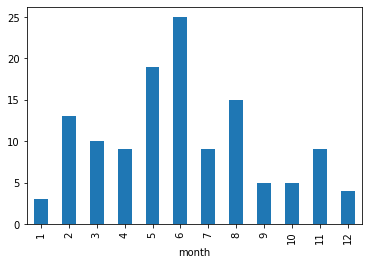

In [ ]:

# for name in data_df.message.unique()[:10]:
data_df[data_df.message == search_name].month.groupby(data_df.month).count().plot(kind='bar')

In [ ]:
data_df['message'].unique()[6]

'VLAN 15 Центробанк (ростелеком)'

In [ ]:
#Соединение всех сообщений в одну таблицу
data_month = pd.concat([data_df[data_df.message == name].month.groupby(data_df.month).count() 
for name in data_df['message'].unique()], axis=1)
# Именя колонок
data_month.columns = [i for i in range(len(data_df['message'].unique()))]
#Вывод
data_month.iloc[:, [i for i in range(10,20)]]


,10,11,12,13,14,15,16,17,18,19
month,,,,,,,,,,
1,NaN,5.0,4.0,59,NaN,44.0,NaN,5.0,7.0,10.0
2,NaN,2.0,15.0,163,2.0,4.0,NaN,11.0,9.0,NaN
3,NaN,NaN,4.0,64,16.0,20.0,NaN,13.0,11.0,NaN
4,NaN,14.0,8.0,49,2.0,7.0,NaN,NaN,NaN,NaN
5,NaN,2.0,3.0,122,4.0,4.0,NaN,NaN,NaN,NaN
6,NaN,NaN,15.0,55,2.0,2.0,NaN,NaN,NaN,3.0
7,NaN,1.0,NaN,59,14.0,15.0,NaN,NaN,NaN,NaN
8,NaN,7.0,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,1.0,39,4.0,7.0,NaN,NaN,NaN,NaN


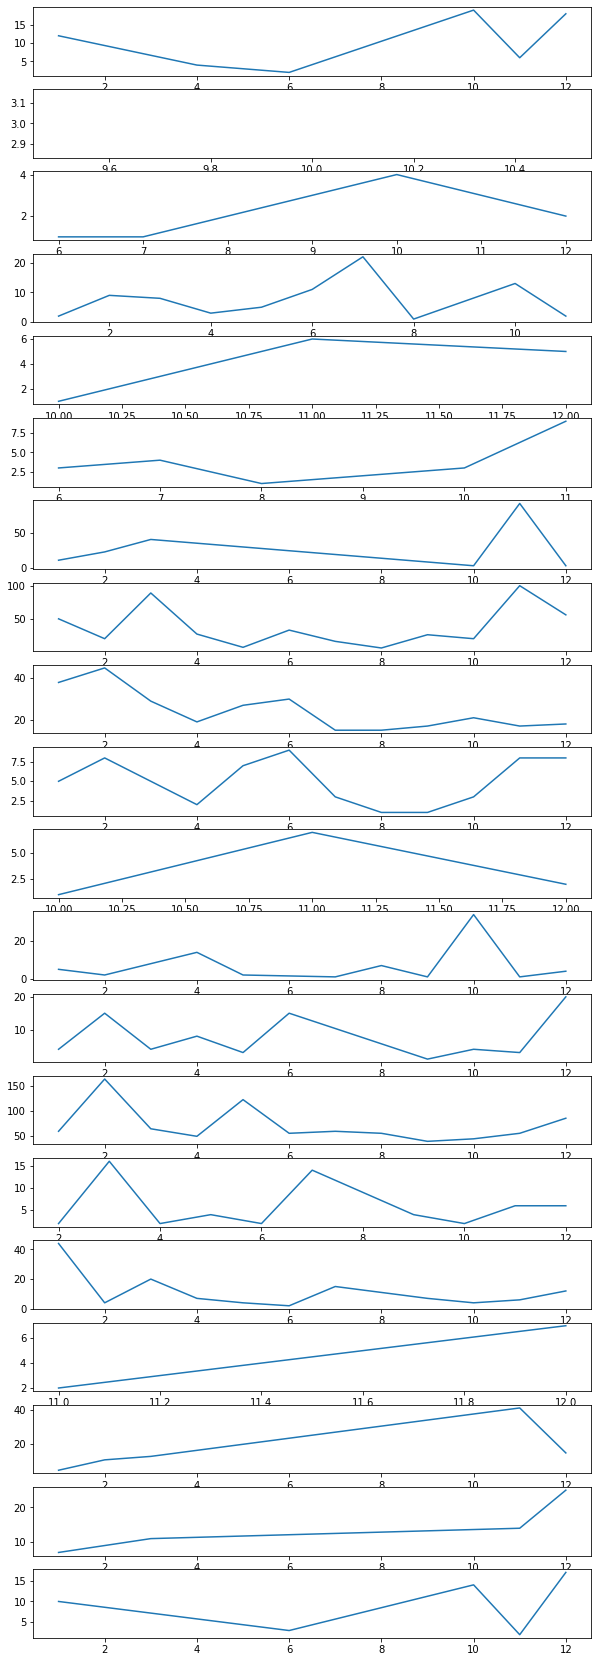

In [ ]:
count_plot = 20
plt.figure(figsize=(10,30))
for i, name in enumerate(data_df['message'].unique()[:count_plot]):
  plt.subplot(count_plot,1,i+1)
  plt.plot(data_df[data_df.message == name].month.groupby(data_df.month).count())


##Распределение по месяцам 1 выбраного сообщения с фильтром по дате

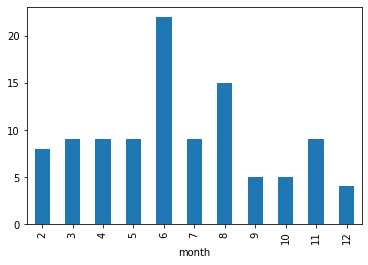

In [ ]:
# search_name = 'Juniper Шаболовка'
# data_df[(data_df.message == search_name)].month.groupby(data_df.month).count().plot(kind='bar')
data_df[(data_df.message == search_name) & (data_df.start_date > '2019-01-01') & (data_df.start_date < '2022-01-01')].month.groupby(data_df.month).count().plot(kind='bar')

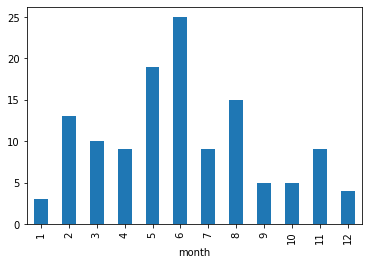

In [ ]:
data_df[(data_df.message == search_name) & (data_df.start_date > '2019-01-01')].month.groupby(data_df.month).count().plot(kind='bar')

#Распределение всех сообщений по часам

In [ ]:
data_df.start_time = pd.to_datetime(data_df.start_time, format='%H:%M:%S') 
data_df['hour'] = data_df.start_time.dt.hour

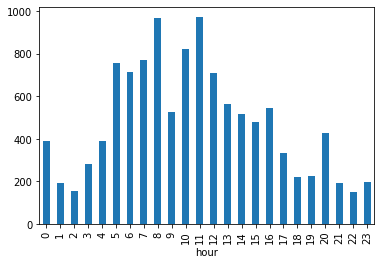

In [ ]:
data_df.hour.groupby(data_df.hour).count().plot(kind='bar')

##Распределение для определенного сообщения по часам

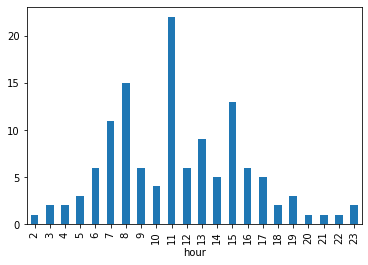

In [ ]:
data_df[data_df.message == search_name]\
        .hour.groupby(data_df.hour)\
        .count()\
        .plot(kind='bar')

###Активное время сообщения

In [ ]:
data_df[data_df.message == search_name].duration.describe()

count                          126
mean     0 days 00:02:30.277777777
std      0 days 00:03:39.914515715
min                0 days 00:00:12
25%         0 days 00:00:31.250000
50%                0 days 00:00:42
75%         0 days 00:02:57.500000
max                0 days 00:19:48
Name: duration, dtype: object

## Выбранные сообщения для определенного часа

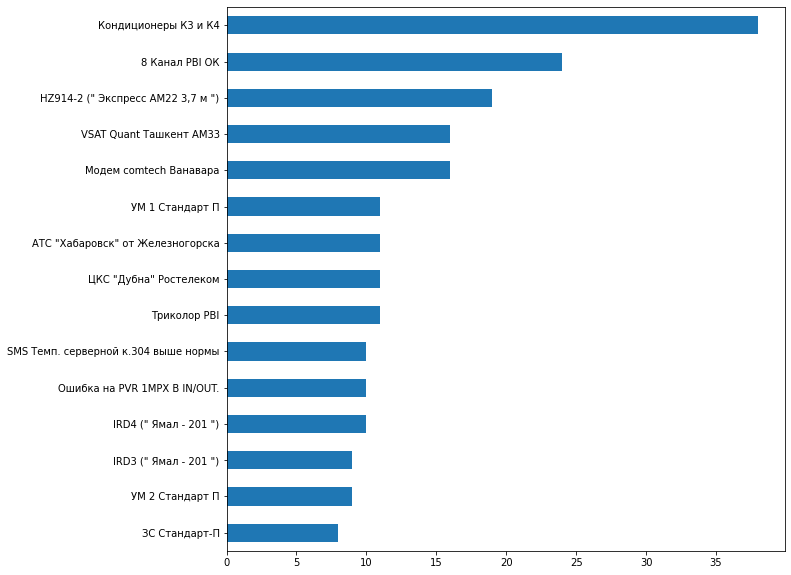

In [ ]:
data_df[(data_df.hour == 9)].message.value_counts(ascending=True).tail(15).plot(kind='barh', figsize=(10, 10))